<a href="https://colab.research.google.com/github/raghavmahajan821/NLP/blob/main/Convert_text_to_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Converting Text to Features using One Hot Encoding
One Hot Encoding converts characters or words into binary
numbers

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Entering text
text="I am learning NLP"
text

'I am learning NLP'

In [ ]:
pd.get_dummies(text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


In [ ]:
pd.get_dummies(text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


##Converting Text to Features using Count Vectorizer
Count vectorizer is almost similar to One Hot encoding. It counts the occurences of words that are present in the document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Entering text
text=['I am learning NLP','I will learn NLP in 2 months because i love NLP']

In [ ]:
# create the transform
vectorizer=CountVectorizer()
# tokenizing
vectorizer.fit(text)
vect=vectorizer.transform(text)
# summarize &
print(vectorizer.vocabulary_)

{'am': 0, 'learning': 4, 'nlp': 7, 'will': 8, 'learn': 3, 'in': 2, 'months': 6, 'because': 1, 'love': 5}


In [ ]:
#  generating output
print(vect.toarray())

[[1 0 0 0 1 0 0 1 0]
 [0 1 1 1 0 1 1 2 1]]


##Converting Text to Features Using N grams Count Vectorizing

In [ ]:
Text = "I am learning NLP"
from textblob import TextBlob
TextBlob(Text).ngrams(1)

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [ ]:
TextBlob(Text).ngrams(2)


[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer
# Text
text = ["I love NLP and I will learn NLP in 2month "]
# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))
# tokenizing
vectorizer.fit(text)
# encode document
vector = vectorizer.transform(text)
# summarize & generating output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
[[1 1 1 1 1 1 1]]


##Converting Text to Features using Tfidf Vectorizing
TF-IDF is the simple product of TF and IDF, which makes predictions and information
  retrieval relevant.

WhatsApp Image 2023-11-06 at 23.49.16 (1).jpeg

**Term frequency (TF):** Term frequency is simply the ratio of the count of a
  word present in a sentence, to the length of the sentence.

  **Inverse Document Frequency (IDF):** IDF of each word is the log of
  the ratio of the total number of rows to the number of rows in a particular
  document in which that word is present.
  IDF will measure the rareness of a term.

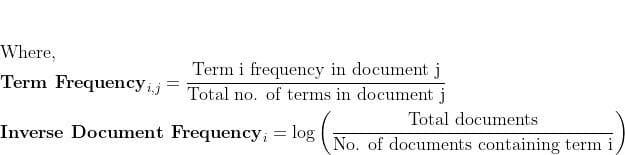
  

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Entering text
text=['I am learning NLP','I will learn NLP in 2 months because i love NLP']

In [ ]:
# create the transform
vectorizer=TfidfVectorizer()
# tokenizing
vectorizer.fit(text)
vect=vectorizer.transform(text)
# summarize &
print(vectorizer.vocabulary_)

{'am': 0, 'learning': 4, 'nlp': 7, 'will': 8, 'learn': 3, 'in': 2, 'months': 6, 'because': 1, 'love': 5}


In [ ]:
#  generating output
print(vect.toarray())

[[0.6316672  0.         0.         0.         0.6316672  0.
  0.         0.44943642 0.        ]
 [0.         0.35300279 0.35300279 0.35300279 0.         0.35300279
  0.35300279 0.50232878 0.35300279]]


##Implementing Word Embeddings

Word Embedding or Word Vector is a numeric vector input that represents a word in a lower-dimensional space. It allows words with similar meanings to have a similar representation.

 A word vector with 50 values can represent 50 unique features.

 Two different approaches to get Word Embeddings:

1) Word2Vec

2) GloVe



---
Here we're discussing word2vec for Word embedding


**word2vec**: word2vec is the deep learning Google framework to train
word embeddings. It will use all the words of the whole corpus and predict
the nearby word.

There are mainly 2 types in word2vec.

• Skip-Gram

• Continuous Bag of Words (CBOW)

Here's the code implementation of CBOW technique

In [ ]:
sentences = [['I', 'love', 'nlp'],
 ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
 ['nlp', 'is', 'future'],
 ['nlp', 'saves', 'time', 'and', 'solves',
'lot', 'of', 'industry', 'problems'],
 ['nlp', 'uses', 'machine', 'learning']]

In [ ]:
#import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [ ]:
# training the model
cbow = Word2Vec(sentences, vector_size=50, window=3, min_count=1, sg=0)
print(cbow)

Word2Vec<vocab=21, vector_size=50, alpha=0.025>


In [ ]:
#access vector for one word
print(cbow.wv['nlp'])

#save model
cbow.save('cbow.bin')

[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


[('problems', 0.27079451084136963), ('solves', 0.21074171364307404), ('machine', 0.16704076528549194), ('and', 0.1503726840019226), ('2', 0.13204394280910492), ('future', 0.1267007291316986), ('is', 0.0998455360531807), ('saves', 0.07082214206457138), ('of', 0.059367649257183075), ('industry', 0.04979120194911957)]


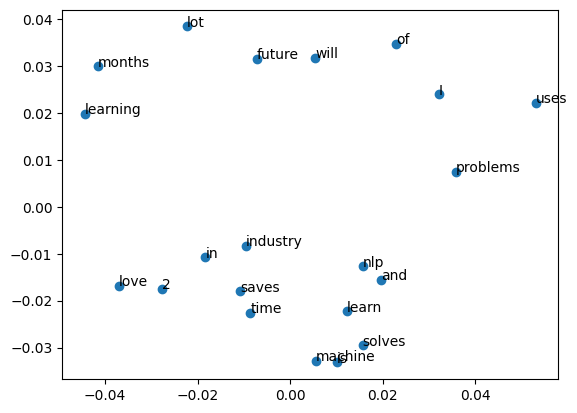

In [ ]:
# access most similar words
similar_words = cbow.wv.most_similar('nlp')
print(similar_words)

# # PCA transformation for dimensionality reduction
X = cbow.wv[cbow.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# # create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.index_to_key)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()